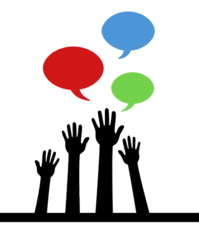

<center><font color=orange size=12px>The Sparks Foundation</font></center>

# predicting the optimum number of clusters and representing it visually.

## Author: Anna Sai Nikhil

### GRIPNOV20

<b> Task 2</b>

### Dataset : The data set can be downloaded from https://bit.ly/3kXTdox or from sklearn datasets

In [145]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import datasets

#For visulization
import matplotlib.pyplot as plt
import seaborn as sns

#for clusters
from sklearn.cluster import KMeans

In [161]:
# Load the iris dataset
input = pd.read_csv('Iris.csv')
input.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
input.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [148]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [149]:
plotable=input.iloc[:,1:5]
plotable

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


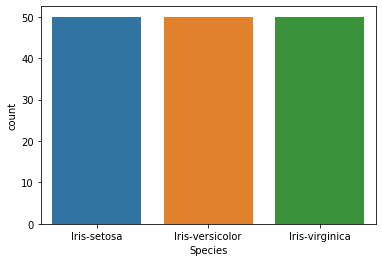

In [150]:
sns.countplot(input['Species'])

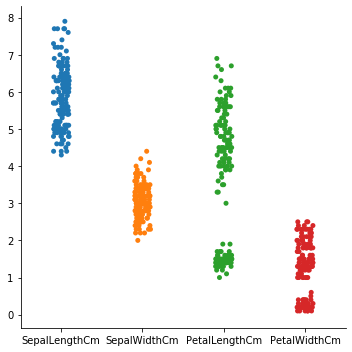

In [151]:
sns.catplot(data=plotable)

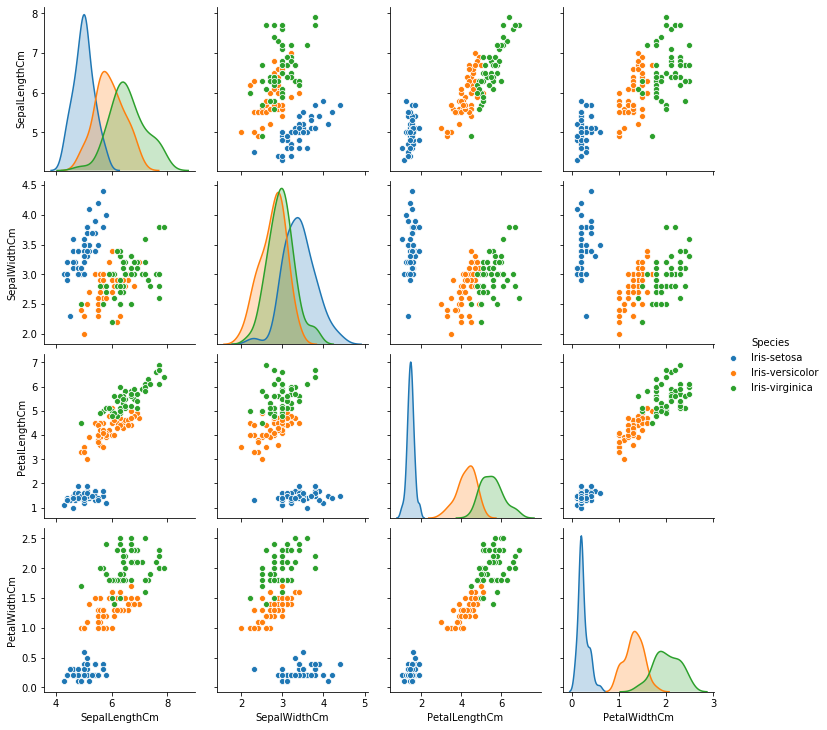

In [165]:
input1=input.iloc[:,1:]
input1
sns.pairplot(input1, hue="Species", height=2.5)

In [166]:
k=[]
for i in range(1,100):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(plotable.iloc[:,[0,1,2,3]])
    k.append(kmeans.inertia_)

In [167]:
k

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.320426739926745,
 30.00336433172303,
 28.16276787101787,
 26.034566442845087,
 24.994277473988006,
 23.189573975044564,
 21.373893366437485,
 20.473527777777782,
 19.269652014652014,
 18.31372317388494,
 17.56143253968254,
 16.230552217390454,
 15.71063966588967,
 14.922224358974358,
 14.165387636872932,
 13.686611111111112,
 13.129380952380954,
 12.679077380952384,
 12.022289072039072,
 11.60148534798535,
 11.411106782106785,
 10.966583333333332,
 10.623142857142858,
 10.153755161505162,
 9.867352564102564,
 9.392465367965368,
 9.535432900432902,
 9.078547619047619,
 8.421884920634922,
 8.433714285714288,
 8.130642857142858,
 7.674682539682539,
 7.8872456709956715,
 7.546972222222222,
 7.327083333333335,
 7.066773809523811,
 6.799194444444446,
 6.596182539682539,
 6.269107142857143,
 5.914416666666667,
 6.105491341991342,
 5.828222222222223,
 5.353928571428573,
 5.42472

Text(0.5, 1.0, 'Elbow method')

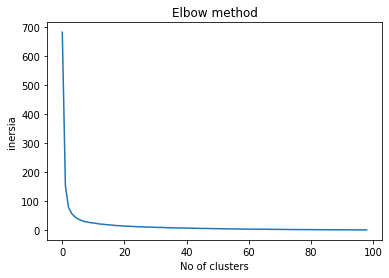

In [168]:
plt.plot(k)
plt.xlabel('No of clusters')
plt.ylabel('inersia')
plt.title('Elbow method')

In [169]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(plotable)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [170]:
input['cluster_number']=kmeans.labels_

In [171]:
input.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_number
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


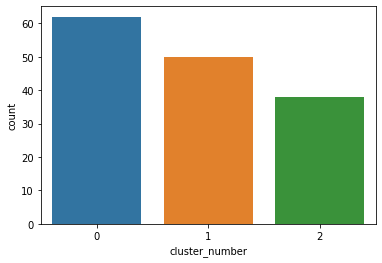

In [172]:
sns.countplot(input.cluster_number)

In [239]:
confusion_data=input.iloc[:,-2:]
pd.options.display.max_rows = None
confusion_data

,Species,cluster_number
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
5,Iris-setosa,1
6,Iris-setosa,1
7,Iris-setosa,1
8,Iris-setosa,1
9,Iris-setosa,1


In [249]:
confusion_datan=confusion_data
confusion_datan['real']=0
confusion_datan

,Species,cluster_number,real
0,Iris-setosa,1,0
1,Iris-setosa,1,0
2,Iris-setosa,1,0
3,Iris-setosa,1,0
4,Iris-setosa,1,0
5,Iris-setosa,1,0
6,Iris-setosa,1,0
7,Iris-setosa,1,0
8,Iris-setosa,1,0
9,Iris-setosa,1,0


In [250]:
confusion_datan.loc[(confusion_datan['Species'] == 'Iris-setosa'), 'real'] = 1
confusion_datan.loc[(confusion_datan['Species'] == 'Iris-virginica'), 'real'] = 2

In [251]:
real=confusion_datan.real
reel=confusion_datan.cluster_number
heatmapper=pd.DataFrame()
heatmapper['real']=real
heatmapper['reel']=reel

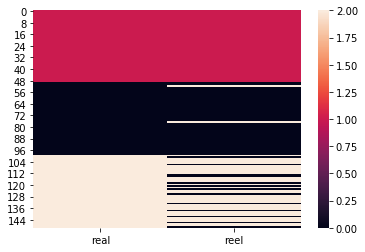

In [252]:
sns.heatmap(data=heatmapper)

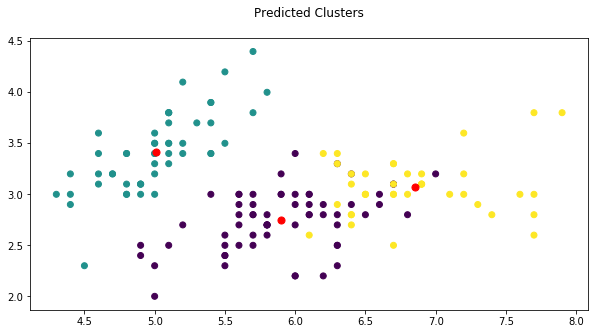

In [263]:
plt.figure(figsize=(10,5))
plt.scatter(input['SepalLengthCm'], input['SepalWidthCm'], c=input.cluster_number)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=50, c='red')
plt.show()
